<a href="https://colab.research.google.com/github/a0pro0b/Diagnosis-and-Treatment-of-Attention-Deficit-Hyperactivity-Disorder-using-Artificial-Intelligence-/blob/main/ADHD_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

allSubs_testSet_phenotypic_dx.csv

In [ ]:
path='/gdrive/My Drive/ML/mywork/'

In [ ]:
raw_data=pd.read_csv(path+'allSubs_testSet_phenotypic_dx.csv')
raw_data.head(5)

,Disclaimer,ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,NaN,1038415,1,1,14.92,1.0,3,ODD,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,NaN,NaN,NaN,1,NaN
1,NaN,1201251,1,1,12.33,1.0,3,NaN,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,NaN,NaN,NaN,1,NaN
2,NaN,1245758,1,0,8.58,1.0,0,NaN,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,NaN,NaN,NaN,1,NaN
3,NaN,1253411,1,1,8.08,1.0,0,NaN,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,NaN,NaN,NaN,1,NaN
4,NaN,1419103,1,0,9.92,1.0,0,NaN,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,NaN,NaN,NaN,1,NaN


Preprocessing

Handedness-ADHD patients tend to be left handed or mixed handed 
DX-output label (any of the three types of adhd and non adhd)




Removing non contributing cols

In [ ]:
raw_data=raw_data.drop(columns=['Disclaimer','ID','Site','Secondary Dx '])

In [ ]:
raw_data

,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1,14.92,1.0,3,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,NaN,NaN,NaN,1,NaN
1,1,12.33,1.0,3,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,NaN,NaN,NaN,1,NaN
2,0,8.58,1.0,0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,NaN,NaN,NaN,1,NaN
3,1,8.08,1.0,0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,NaN,NaN,NaN,1,NaN
4,0,9.92,1.0,0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1,15.90,1.0,3,NaN,NaN,NaN,NaN,2,2.0,127.0,105.0,NaN,117.0,1,NaN,NaN,NaN,1,NaN
193,1,13.87,1.0,0,NaN,NaN,NaN,NaN,1,2.0,135.0,119.0,NaN,130.0,1,NaN,NaN,NaN,1,NaN
194,0,15.04,1.0,3,NaN,NaN,NaN,NaN,2,2.0,95.0,88.0,NaN,90.0,1,NaN,NaN,NaN,1,NaN
195,1,13.64,1.0,0,NaN,NaN,NaN,NaN,1,2.0,114.0,109.0,NaN,113.0,1,NaN,NaN,NaN,0,NaN


Fill all NAN by 0

In [ ]:
raw_data=raw_data.fillna(-99999)

In [ ]:
raw_data

,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1,14.92,1.0,3,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
1,1,12.33,1.0,3,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
2,0,8.58,1.0,0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
3,1,8.08,1.0,0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
4,0,9.92,1.0,0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1,15.90,1.0,3,-99999,-99999,-99999,-99999,2,2.0,127.0,105.0,-99999.0,117.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
193,1,13.87,1.0,0,-99999,-99999,-99999,-99999,1,2.0,135.0,119.0,-99999.0,130.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
194,0,15.04,1.0,3,-99999,-99999,-99999,-99999,2,2.0,95.0,88.0,-99999.0,90.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
195,1,13.64,1.0,0,-99999,-99999,-99999,-99999,1,2.0,114.0,109.0,-99999.0,113.0,1,-99999.0,-99999.0,-99999.0,0,-99999.0


Deleting the pending rows

In [ ]:
dropset=raw_data.index[raw_data['DX']=="pending"].tolist()
dropset,len(dropset)

([51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 26)

In [ ]:
raw_data.drop(raw_data.index[dropset],inplace=True)

In [ ]:
raw_data

,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1,14.92,1.0,3,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
1,1,12.33,1.0,3,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
2,0,8.58,1.0,0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
3,1,8.08,1.0,0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
4,0,9.92,1.0,0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1,15.90,1.0,3,-99999,-99999,-99999,-99999,2,2.0,127.0,105.0,-99999.0,117.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
193,1,13.87,1.0,0,-99999,-99999,-99999,-99999,1,2.0,135.0,119.0,-99999.0,130.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
194,0,15.04,1.0,3,-99999,-99999,-99999,-99999,2,2.0,95.0,88.0,-99999.0,90.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
195,1,13.64,1.0,0,-99999,-99999,-99999,-99999,1,2.0,114.0,109.0,-99999.0,113.0,1,-99999.0,-99999.0,-99999.0,0,-99999.0


In [ ]:
raw_data=raw_data.reset_index()
raw_data

,index,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,0,1,14.92,1.0,3,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
1,1,1,12.33,1.0,3,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
2,2,0,8.58,1.0,0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
3,3,1,8.08,1.0,0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
4,4,0,9.92,1.0,0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,192,1,15.90,1.0,3,-99999,-99999,-99999,-99999,2,2.0,127.0,105.0,-99999.0,117.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
167,193,1,13.87,1.0,0,-99999,-99999,-99999,-99999,1,2.0,135.0,119.0,-99999.0,130.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
168,194,0,15.04,1.0,3,-99999,-99999,-99999,-99999,2,2.0,95.0,88.0,-99999.0,90.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
169,195,1,13.64,1.0,0,-99999,-99999,-99999,-99999,1,2.0,114.0,109.0,-99999.0,113.0,1,-99999.0,-99999.0,-99999.0,0,-99999.0


In [ ]:
raw_data.drop(columns=['index'],inplace=True)
raw_data

,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1,14.92,1.0,3,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
1,1,12.33,1.0,3,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
2,0,8.58,1.0,0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
3,1,8.08,1.0,0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
4,0,9.92,1.0,0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,15.90,1.0,3,-99999,-99999,-99999,-99999,2,2.0,127.0,105.0,-99999.0,117.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
167,1,13.87,1.0,0,-99999,-99999,-99999,-99999,1,2.0,135.0,119.0,-99999.0,130.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
168,0,15.04,1.0,3,-99999,-99999,-99999,-99999,2,2.0,95.0,88.0,-99999.0,90.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
169,1,13.64,1.0,0,-99999,-99999,-99999,-99999,1,2.0,114.0,109.0,-99999.0,113.0,1,-99999.0,-99999.0,-99999.0,0,-99999.0


splitting ip and op

In [ ]:
ip=raw_data.drop(columns=['DX'])

In [ ]:
#type(ip)

In [ ]:
ip.shape

(171, 19)

In [ ]:
ip

,Gender,Age,Handedness,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1,14.92,1.0,1,52,34,18,1,3.0,109.0,103.0,-999.0,107.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
1,1,12.33,1.0,1,49,28,21,2,3.0,115.0,103.0,-999.0,110.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
2,0,8.58,1.0,1,35,20,15,1,3.0,121.0,88.0,-999.0,106.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
3,1,8.08,1.0,1,35,19,16,1,3.0,119.0,106.0,-999.0,114.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
4,0,9.92,1.0,1,41,22,19,1,3.0,124.0,76.0,-999.0,102.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,15.90,1.0,-99999,-99999,-99999,-99999,2,2.0,127.0,105.0,-99999.0,117.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
167,1,13.87,1.0,-99999,-99999,-99999,-99999,1,2.0,135.0,119.0,-99999.0,130.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
168,0,15.04,1.0,-99999,-99999,-99999,-99999,2,2.0,95.0,88.0,-99999.0,90.0,1,-99999.0,-99999.0,-99999.0,1,-99999.0
169,1,13.64,1.0,-99999,-99999,-99999,-99999,1,2.0,114.0,109.0,-99999.0,113.0,1,-99999.0,-99999.0,-99999.0,0,-99999.0


In [ ]:
op=raw_data['DX']

In [ ]:
op.shape

(171,)

In [ ]:
op

0      3
1      3
2      0
3      0
4      0
      ..
166    3
167    0
168    3
169    0
170    3
Name: DX, Length: 171, dtype: object

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1,random_state=100)
ip,op=sm.fit_sample(ip,op.ravel())
#sm.fit(x_test,y_test)
ip,op=sm.fit_resample(ip,op.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ip.shape,op.shape

((376, 19), (376,))

Splitting train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.25, random_state=2)

In [ ]:
l=np.unique(y_train)
l

array(['0', '1', '2', '3'], dtype=object)

In [ ]:
ll=np.unique(y_test)
ll

array(['0', '1', '2', '3'], dtype=object)

During split there is a class imbalance - y test does not have class '2'

So we oversample the ip and op using SMOTE - When oversampling class'2' has only 2 samples, so we set k_neighbours<2 ie 1

RandomOverSampler could also be used that does not care about k-neighbours to increase the sample

To reduce samples we can use NearMiss() algorithm (undersampling)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((282, 19), (282,), (94, 19), (94,))

Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000);
x=np.array(x_train)
y=np.ravel(y_train)
xt=np.array(x_test)
yt=np.ravel(y_test)
model.fit(x,y)  
y_train_pred=model.predict(x)
#Calculating score - Accuracy of model
train_score=model.score(x,y)
train_score
#print(x)
#print(y)

0.7092198581560284

Plot error for different iterations

In [ ]:
#error=[]
#y_train=y_train.ravel()
#for i in range(500,1000):
#  lr=LogisticRegression(max_iter=i,solver='liblinear')
  #print('k value {}'.format(i))
#  lr.fit(x_train,y_train)
#  pred_i=lr.predict(x_test)
  #print(classification_report(y_test,pred_i))
#  accuracy=accuracy_score(pred_i,y_test)*100
#  error.append(100-accuracy)

In [ ]:
#print(error)

In [ ]:
#plt.figure(figsize=(10,10))
#plt.plot(range(4000,5000),error,color='red',markersize=10)
#plt.title('Error rate vs iter')
#plt.xlabel('iter')
#plt.ylabel('Error')

In [ ]:
#error[400]

As default solver:'lbfs' is showing cannot converge and promts to change:

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

LogisticRegression was done with (4000-5000) max iterations using solver:saga - But at error[400] still the error is 43

So Logistic regression is done using (500-1000) max iterations using solver:newton-cg where error reduces to 21

newton-cg (uses second derivatives - hessian matrix - slow for big databases as second derivative needs to be calculated)

lbfgs-Limited-memory Broyden–Fletcher–Goldfarb–Shanno-approximates second derivative and stores  last few updates - so comparitively fast - default solver

liblinear-Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.

sag-Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets.

saga-Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

In [ ]:
y_test_pred=model.predict(xt)
#Calculating score - Accuracy of model
test_score=model.score(xt,yt)
test_score

0.5957446808510638

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yt,y_test_pred))

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        24
           1       0.58      0.56      0.57        25
           2       0.78      1.00      0.88        25
           3       0.45      0.50      0.48        20

    accuracy                           0.60        94
   macro avg       0.56      0.59      0.57        94
weighted avg       0.57      0.60      0.58        94



Use GridCV to get best hyper parameters for logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_GS=GridSearchCV(model,param_grid={})
clf_GS.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf_GS.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_GS.best_score_

0.7090225563909774

Logistic Regression - 70% accuracy

Applying KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=20)   #n_neighbours is k value
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
y_pred1=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.57      0.64      0.60        25
           2       0.95      0.84      0.89        25
           3       0.42      0.50      0.45        20

    accuracy                           0.66        94
   macro avg       0.67      0.65      0.66        94
weighted avg       0.69      0.66      0.67        94



In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred1)*100
print("Accuracy {}%".format(round(accuracy,2)))

Accuracy 65.96%


Adjustin k value and checking accuracy

In [ ]:
error=[]
y_train=y_train.ravel()
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  print('k value {}'.format(i))
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  print(classification_report(y_test,pred_i))
  accuracy=accuracy_score(pred_i,y_test)*100
  error.append(100-(accuracy*100))

k value 1
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.84      0.84      0.84        25
           2       0.96      1.00      0.98        25
           3       0.82      0.90      0.86        20

    accuracy                           0.85        94
   macro avg       0.85      0.85      0.85        94
weighted avg       0.85      0.85      0.85        94

k value 2
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.90      0.76      0.83        25
           2       1.00      0.96      0.98        25
           3       0.85      0.85      0.85        20

    accuracy                           0.86        94
   macro avg       0.87      0.86      0.86        94
weighted avg       0.87      0.86      0.86        94

k value 3
              precision    recall  f1-score   support

           0       0.74      0.71      0.72  

Plot and visualize accuracy

Text(0, 0.5, 'Error')

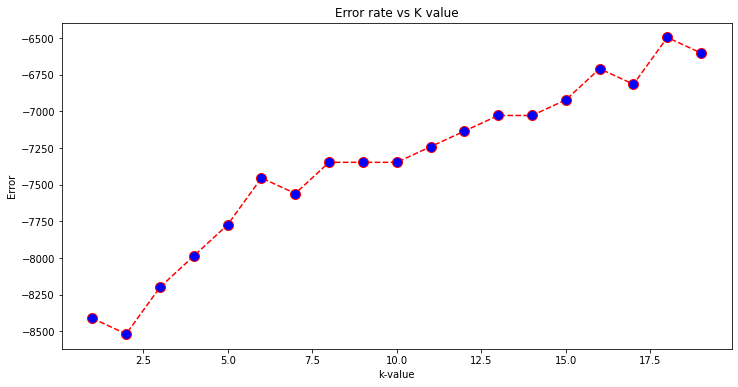

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k-value')
plt.ylabel('Error')

When k=8 error is minimal and accuracy is maximum

Let us check with GridCV

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_GS=GridSearchCV(knn,param_grid={})
clf_GS.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=19, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf_GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
clf_GS.best_score_

0.6383458646616542

When n_neighbour=8 accuracy is high - so i fix

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
pred_i=knn.predict(x_test)
print(classification_report(y_test,pred_i))
accuracy=accuracy_score(pred_i,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.65      0.60      0.63        25
           2       0.96      0.96      0.96        25
           3       0.60      0.75      0.67        20

    accuracy                           0.74        94
   macro avg       0.74      0.74      0.74        94
weighted avg       0.75      0.74      0.74        94

74.46808510638297


KNN at k=8  gives 88.37% accuracy

Applying NaiveBayes Classifier

Applying BournolliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB   #Multiple features must be binary
classifier1=BernoulliNB()
classifier1.fit(x_train,y_train)
y_pred1=classifier1.predict(x_test)
from sklearn.metrics import classification_report
targets=["Other issues","Impulsive_Hyperactive_ADHD","Inattentive_Distractible_ADHD","Combined"]
print(classification_report(y_test,y_pred1,target_names=targets))

                               precision    recall  f1-score   support

                 Other issues       0.58      0.46      0.51        24
   Impulsive_Hyperactive_ADHD       0.50      0.04      0.07        25
Inattentive_Distractible_ADHD       0.74      1.00      0.85        25
                     Combined       0.36      0.70      0.47        20

                     accuracy                           0.54        94
                    macro avg       0.54      0.55      0.48        94
                 weighted avg       0.55      0.54      0.48        94



Applying GuassianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB  #For 
classifier2=GaussianNB()
classifier2.fit(x_train,y_train)
y_pred1=classifier2.predict(x_test)
targets=["Other issues","Impulsive_Hyperactive_ADHD","Inattentive_Distractible_ADHD","Combined"]
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1,target_names=targets))

                               precision    recall  f1-score   support

                 Other issues       0.60      0.38      0.46        24
   Impulsive_Hyperactive_ADHD       0.00      0.00      0.00        25
Inattentive_Distractible_ADHD       0.86      0.72      0.78        25
                     Combined       0.33      0.95      0.49        20

                     accuracy                           0.49        94
                    macro avg       0.45      0.51      0.43        94
                 weighted avg       0.45      0.49      0.43        94



Applying ComplementNB

In [ ]:
#from sklearn.naive_bayes import ComplementNB
#classifier3=ComplementNB()
#classifier3.fit(x_train,y_train)
#y_pred1=classifier3.predict(x_test)
#targets=["Other issues","Impulsive_Hyperactive_ADHD","Inattentive_Distractible_ADHD"]
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred1,target_names=targets))

Applying DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
adhdtree=DecisionTreeClassifier(criterion='gini',)
adhdtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
x_train.shape

(282, 19)

In [ ]:
all_features=raw_data.columns
all_features
ip_features=all_features.delete(3)
ip_features

Index(['Gender', 'Age', 'Handedness', 'ADHD Measure', 'ADHD Index',
       'Inattentive', 'Hyper/Impulsive', 'Med Status', 'IQ Measure',
       'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ', 'QC_Rest_1',
       'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1',
       'QC_Anatomical_2'],
      dtype='object')

In [ ]:
adhd_label='DX'

In [ ]:
y_pred_train=adhdtree.predict(x_train)
y_pred_test=adhdtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred_test)
print("train Accuracy {}%".format(train_accuracy*100))
print("test Accuracy {}%".format(test_accuracy*100))

train Accuracy 100.0%
test Accuracy 77.6595744680851%


In decision tree we are facing over fitting and let us try to prune by adjusting the ccp_alpha

In [ ]:
path=adhdtree.cost_complexity_pruning_path(x_train,y_train)

In [ ]:
alpha=path.ccp_alphas
print(alpha)

[0.         0.00321365 0.00329281 0.00332447 0.00332447 0.00336879
 0.00337724 0.0034279  0.0035461  0.00567376 0.00570753 0.00591017
 0.00609591 0.0062839  0.0062839  0.00644745 0.00664226 0.00797872
 0.00896868 0.01174691 0.01182033 0.01431335 0.01489362 0.01737589
 0.01746185 0.02235937 0.02455998 0.02752924 0.02879005 0.03680007
 0.03682511 0.04844033 0.11015474 0.14887048]


In [ ]:
len(alpha)

34

In [ ]:
impurities=path.impurities
print(impurities)

[0.         0.01285461 0.01944022 0.02608916 0.0327381  0.03947568
 0.04623016 0.05308595 0.05663205 0.06230581 0.06801334 0.07392351
 0.08001942 0.08630332 0.09258721 0.09903467 0.10567693 0.11365565
 0.131593   0.14333992 0.15516025 0.16947359 0.18436721 0.2017431
 0.2366668  0.25902617 0.28358615 0.31111539 0.3686955  0.40549557
 0.44232068 0.49076101 0.60091575 0.74978623]


plot alpha and impurities

Text(0.5, 1.0, 'alpha vs impurities')

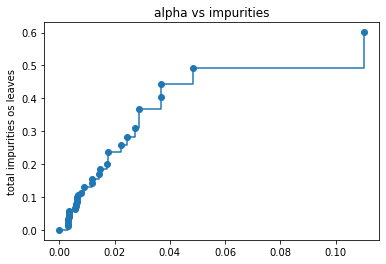

In [ ]:
fig,ax=plt.subplots()
ax.plot(alpha[:-1],impurities[:-1],marker='o',drawstyle="steps-post")
ax.set_xlabel='effective alpha'
ax.set_ylabel('total impurities os leaves')
ax.set_title('alpha vs impurities')

Applying ccp_alphas from the array

In [ ]:
new_adhd_trees=[]
i=0
for a in alpha:
  new_adhd_tree=DecisionTreeClassifier(criterion='gini',ccp_alpha=a)
  new_adhd_tree.fit(x_train,y_train)
  new_adhd_trees.append(new_adhd_tree)
  #dot_name='survive_tree'+str(i)+'.dot'
  #export_graphviz(survivetree,out_file=dot_name,feature_names=ip_features,class_names=surived_label,rounded=True,precision=1,filled=True,special_characters=True,)
  #graph=gr.graph_from_dot_file(dot_name)
  #png='survive_tree_png'+str(i)+'.png'
  #graph.write_png(png)
  i=i+1

Find position of best alpha in train

In [ ]:
train_scores=[new_adhd_tree.score(x_train,y_train) for new_adhd_tree in new_adhd_trees]
print(train_scores)
print('max f1 train score={}'.format(max(train_scores)))
print('position of max train scores{}'.format(np.argmax(train_scores)))

[1.0, 0.9929078014184397, 0.9893617021276596, 0.9822695035460993, 0.9822695035460993, 0.9787234042553191, 0.975177304964539, 0.9716312056737588, 0.9680851063829787, 0.9645390070921985, 0.9609929078014184, 0.9574468085106383, 0.9539007092198581, 0.9468085106382979, 0.9468085106382979, 0.9432624113475178, 0.9397163120567376, 0.9361702127659575, 0.9219858156028369, 0.9148936170212766, 0.9042553191489362, 0.8936170212765957, 0.8829787234042553, 0.8687943262411347, 0.8368794326241135, 0.8156028368794326, 0.7872340425531915, 0.7730496453900709, 0.7127659574468085, 0.6914893617021277, 0.6702127659574468, 0.5602836879432624, 0.48936170212765956, 0.2624113475177305]
max f1 train score=1.0
position of max train scores0


Find position of best alpha in test

In [ ]:
test_scores=[new_adhd_tree.score(x_test,y_test) for new_adhd_tree in new_adhd_trees]
print(test_scores)
print('max f1 test score={}'.format(max(test_scores)))
print('position of max test scores{}'.format(np.argmax(test_scores)))

[0.776595744680851, 0.776595744680851, 0.8297872340425532, 0.7978723404255319, 0.776595744680851, 0.776595744680851, 0.7659574468085106, 0.8085106382978723, 0.776595744680851, 0.7659574468085106, 0.776595744680851, 0.7659574468085106, 0.7553191489361702, 0.7446808510638298, 0.7553191489361702, 0.7553191489361702, 0.7553191489361702, 0.7446808510638298, 0.776595744680851, 0.7553191489361702, 0.7872340425531915, 0.776595744680851, 0.7659574468085106, 0.723404255319149, 0.7127659574468085, 0.7127659574468085, 0.6808510638297872, 0.6808510638297872, 0.6808510638297872, 0.6595744680851063, 0.6702127659574468, 0.5425531914893617, 0.46808510638297873, 0.2127659574468085]
max f1 test score=0.8297872340425532
position of max test scores2


Visualize best ccp_alpha

No handles with labels found to put in legend.


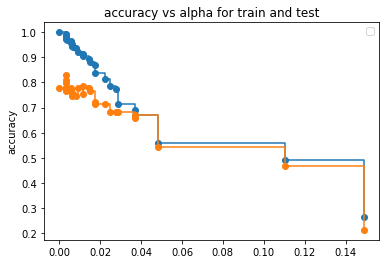

In [ ]:
fig,ax=plt.subplots()
ax.set_xlabel='alpha'
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for train and test')
ax.plot(alpha,train_scores,marker='o',drawstyle="steps-post")
ax.plot(alpha,test_scores,marker='o',drawstyle="steps-post")
ax.legend()
plt.show()

So ccp_alpha=12th value looks better

Applying the ccp_alpha=12th value to avoid overfitting and to prune

In [ ]:
from sklearn.tree import DecisionTreeClassifier
prunedtree=DecisionTreeClassifier(criterion='gini',ccp_alpha=alpha[12])
prunedtree.fit(x_train,y_train)
new_y_pred_train=prunedtree.predict(x_train)
new_y_pred_test=prunedtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy_new=accuracy_score(y_train,new_y_pred_train)
test_accuracy_new=accuracy_score(y_test,new_y_pred_test)
print("train Accuracy {}%".format(train_accuracy_new*100))
print("test Accuracy {}%".format(test_accuracy_new*100))

train Accuracy 95.39007092198581%
test Accuracy 76.59574468085107%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,new_y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.93      0.97      0.95        69
           2       1.00      0.99      0.99        69
           3       0.96      0.92      0.94        74

    accuracy                           0.95       282
   macro avg       0.95      0.95      0.95       282
weighted avg       0.95      0.95      0.95       282



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,new_y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        24
           1       0.67      0.72      0.69        25
           2       1.00      1.00      1.00        25
           3       0.69      0.55      0.61        20

    accuracy                           0.77        94
   macro avg       0.76      0.75      0.76        94
weighted avg       0.77      0.77      0.76        94



Now we see overfitting is reduced

Check by applying Grid CV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
adhdtreenew=DecisionTreeClassifier()
adhdtreenew.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
param_dict={"criterion":["gini","entropy"],"max_depth":range(1,62),"ccp_alpha":range(0,1),"max_depth":range(0,30)}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_GS=GridSearchCV(adhdtreenew,param_dict,cv=10,verbose=1,n_jobs=-1)
clf_GS.fit(x_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': range(0, 1),
                         'cr

In [ ]:
clf_GS.best_params_

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 21}

In [ ]:
clf_GS.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=21, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf_GS.best_index_

51

In [ ]:
clf_GS.best_score_

0.8402709359605911

Among all KNN at k=8 gives high accuracy